# How to Visualize Each Of Thise Layer Output In Pytorch

In this note book you build simple model architacture to train minist dataset. Before model training is complete than move on to visualize pytorch execution graph.

And most exciting part in this notebook visualize each of thise output of layer such as Convulation,max pool,Linear, and etc. 

This is main topic of this notebook not for build a model train them and then move on to predict real world dataset. That part usally every whare evailable.

Now you understand what is main topic cover in this article.

If yes now checkout.

## First install pytorch torchviz libary 

This libary using for me visualize architacture of the model so first install libary in your notebook.

In [1]:
!pip install torchviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4148 sha256=f2eb343bec81716dbe32cf95cbf0cb01c411cd193db9f33ee37290eee0767e5b
  Stored in directory: /root/.cache/pip/wheels/29/65/6e/db2515eb1dc760fecd36b40d54df65c1e18534013f1c037e2e
Successfully built torchviz


## Import All Neccassary Libary For Using In This Notebook

In this time you can import some of the most important libary for complete your in this note task.

once import is done than move on to next section for load and transformed.

In [2]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import numpy as np
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
from torchviz import make_dot
from sklearn.metrics import confusion_matrix
import seaborn as sns


%matplotlib inline




## Load MINIST Dataset And Transform Data.

**Understand each of thise line code in downbelow:**


**device = torch.device('cuda' if torch.cuda.is_availbale() else 'cpu')**
This code work on to select GPU or CPU running by pytorch code. torch.cuda.is_availbale()  It's simple mean  if GPU is available than return True other wise return False.


**batch_size**: It's simple mean is how many example pass thorgh feedforward and backword at a time. Example is suppose your training dataset 500 example have and if you set to batch size 30. That simply mean model don't see whole of the dataset one at a time he only see 30 example at a time and repeated this process.

**transform:** It is a big topic but I only discuss what I am write on down below. transform.Compose([...]) it's teqnique to transform sequentially each of this image.
transform.ToTensor() It's simply convert image to pytorch tensor becuse that is requred for model don't working with raw image file. transform.Normalize() It's simply mean normalize across all the channels with mean and standard deviation.

**datasets.MNIST():** It's create by pytorch dataset object for the MINIST Dataset. this is populer dataset for contain hand writen 0 to 9 digits. see each of this parameter you set on downbelow.
  * **root:** It's diractory of the path whare you can load this data.
  * **train:** This is set to True mean load train data. if you set to False mean load test dataset.
  * **download:** If you set to true that download dataset form the internet and put your root directory. and if alredy download so don't download again.
  * **transform:** It's parameter you can set of transformation to apply your dataset. in this case I only convert to pytorch tensor and normalize data.

**DataLoader:** It's create by pytorch DataLoader object. which used for load whole data into batch of pytorch dataset during for training neural network. in this time we only see some of  thise parameter.
 * **dataset:** It's actual data for you load.
 * **batch_size:**  This specify how many sample you load in per batch.
 * **shuffle:** If you this parameter set True that mean reshuffled at every epoch. default is (False).










In [3]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

batch_size = 64

# Define the transforms to apply to the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load the MNIST dataset and apply the transforms
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders for the training and test sets
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## Display One Image

I am store train dataset into DataLoader It's can be through iterate dataset. 
If you get only one image than syntax look like this **DataLoader.dataset[index number]** just like a python list indexing.

torch.Size([1, 28, 28])


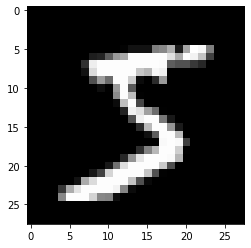

In [27]:
images, label = trainloader.dataset[0]
print(images.shape)
plt.imshow(images.squeeze(),cmap='gray');

## Create Neural Network With Pytorch

See how many layer and activation function add downbelow neural network and see sort brif driscription each for layer and activation function.

In this architecture under have 2 convulation , 2 Relu Activation, 2 max pooling, 1 dropout, 1 linear , last 1 softmax activation for predict multiclass classification. And every convulation before add relu activation function.

In this time I not go deeper of this neural network but some of topic I toches what is do.

**Convulation:**  *in_channels* mean how many channels have in your image in my case I am set to 1 mean my image is grayscale. *out_channels* it's specify how many filter to apply. and number of channels produce by layer. kernel_size set to 3 it's simply mean 3x3 kernel to computer the output feature map. 


**Relu Activation:** working for activate node when input value above the zero. If value is less than zero mean set to zero and grater than zero set it self or simple it's model intruduce non-linear and increase expansive power of the model.


**MaxPooling Layer:** mostly used on befor convulaton layer becuse it's working on downsample of the feature maps. It's only get highest probability feature map. And this operation reduce the size of the feature and retrainig model most important feature.

**Dropout Layer:** It's mostly used for stop overfitting. and that is randomly dropped some fo the neurons every epoch. In my case I am set 0.5 which mean is each neuron in the input will have a 50% of being probabilites dropped durring training time and then pass thourgh linear layer. Also called it's maintain by every neuron learn same weight mean not to high or not to low. Example when you train on dataset that time some part of the network learn high weight and another dosen't get much more training. that time turn off large weight training part and turn on which part not train on large weight. 

**Linear Layer:** in_features represent how much input feature you input and out_features represent how much output feature to return. After the linear output feature come form then pass thorgh softmax activation function.

**Softmax Activation:** provide probabilites distibution of the output classes.




In [28]:
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        self.dropout = nn.Dropout(p=0.5)
        self.fc1 = nn.Linear(in_features=1600, out_features=num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.fc1(x)
        x = self.softmax(x)
        return x

## Train And Compile Above Neural Network

If above neural network class is complete. now first step create object of neural network and another name is create a model.

than move on to specify loss function and optimizer function.

if above step is complete. than set how many time to train model simple is epoch value set. In my case I am set to 2 becuse that is not main part of this article so don't time west this area. 

Everything nicely work now loop thorgh and enumerate train data loader. 
**optimizer.zero_grad():** Set all gradient value to zero before gradient compute the next epoch. that main resion for using gradient only looking current mini-batch not looking previous mini-batch.

Pass thourg data into model. and than model return output.
Once output is get pass thorugh predicted output and actual label into loss function. and return loss value.

Than start backpropegation to update model parameter and find best way to decrease to loss value.



In [29]:

net = Net(10)
# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Train the model
num_epochs = 2
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

[1,   100] loss: 1.799
[1,   200] loss: 1.643
[1,   300] loss: 1.622
[1,   400] loss: 1.616
[1,   500] loss: 1.609
[1,   600] loss: 1.605
[1,   700] loss: 1.592
[1,   800] loss: 1.595
[1,   900] loss: 1.525
[2,   100] loss: 1.501
[2,   200] loss: 1.499
[2,   300] loss: 1.497
[2,   400] loss: 1.498
[2,   500] loss: 1.495
[2,   600] loss: 1.497
[2,   700] loss: 1.496
[2,   800] loss: 1.492
[2,   900] loss: 1.493
Finished Training


### See summary of the model

In [30]:
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=1600, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)


## See How to Visualize Excecusation Graph

In this section you using on torchviz libary under make_dot() function to generate visualize computation graph of your model.

This function required output of the model and parameter of the model but that is dictionary format. and then using render() method for me specify file name and format of the image.

If work nicely than move on to open this file and see what look like actual model excecusion graph.

In [31]:
images = images.unsqueeze(0)
tag_scores = net(images)

make_dot(tag_scores, params=dict(list(net.named_parameters()))).render("rnn_torchviz", format="png")


'rnn_torchviz.png'

## Visualize Confusion Matrix

In this section you see how to create confusion matrix.

One of the simple way to build confusion matrix is just call it scikit-learn metrics module include spacial function name is confusion_matrix(). It's is complete you job nicely. 

**Now understand downbelow code.**

 * ```net.eval()```: It's mean model set to evaluation mode.
 * Create two empty list for one store actual label and another store predicted label
 * ```torch.no_grad()```: It's disable to gradient calculation for validation time. It's usefull speed up computation and reduce memory useg when gradient not needed.

 * Loop through testloader object and get them image,and label.
 * model called and pass through input image. now model return as probabilites each of thise class.
 * Get highest probabilies and store them new variable name is predicted.
 * Convert predicted and actual label torch tensor to python list. 

In this time predicted and actual label is ready. and now move on using scikit-learn confusion matrix function.
 * ```confusion_matrix()```: It's require two value one is true label and another is predicted label.
 * I am store confusion matrix value to new variable.
 * Now printed confusion matrix value and see what look like.


In [32]:
# Set the model to evaluation mode
net.eval()

# Create empty lists to store predicted labels and ground truth labels
pred_labels = []
true_labels = []

# Iterate over the test set and predict labels
with torch.no_grad():
    for images, labels in testloader:
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        pred_labels += predicted.tolist()
        true_labels += labels.tolist()

# Create the confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Print the confusion matrix
print(cm)

[[ 973    0    0    0    0    0    5    1    1    0]
 [   0 1131    1    2    0    0    0    1    0    0]
 [   0    6 1014    0    1    0    0   11    0    0]
 [   1    0    1  997    0    0    0    8    1    2]
 [   1    0    1    0  958    0    7    4    0   11]
 [   3    1    2    8    0  857   10    5    0    6]
 [   5    2    0    0    1    1  947    0    2    0]
 [   0    0    9    1    0    0    0 1016    1    1]
 [  10    2    5    6    4    1    4    9  921   12]
 [   3    5    1    1    3    1    1   11    0  983]]


## Visualize Confusion-Matrix With Seaborn

In this section you see how to create color full way to visualize confusion matrix.

 * First import **seaborn** libary
 * Create matplotlib figure
 * Create seaborn heatmat and pass through confusion matrix. and also set parameter annot=True , and fmt='d'.
 * Set titile , xlabel, and ylabel value.
 * Final step show the plot.

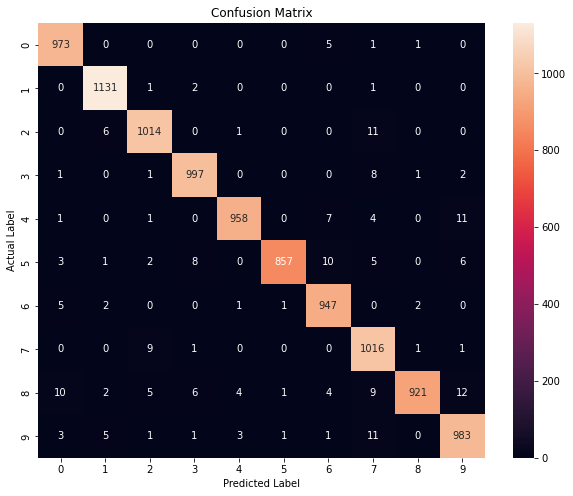

In [33]:
plt.figure(figsize=(10,8))
fig = sns.heatmap(cm, annot=True,fmt='d')
plt.title('Confusion Matrix');
plt.xlabel('Predicted Label');
plt.ylabel('Actual Label');
plt.show();

## Create Two Visualize Function.
In this section you create two function for help you to visualize layer output.

One function visualize convulation and maxpooling layer output. and another function visualize flatten , dropout, and linear layer output.

**Dive Deeper Of These Function**

First create Convulation and MaxPooling layer output visualize function. I am name set to this function *conv_max_layer_plot()*.

In this function require 4 arguments.
 
 1. **nrows :** It's input as integer and this value specify how many row in figure.
 2. **rcols :** It's also input as integer and this value specify how many column in figure.
 3. **title :** This parameter input as string. that value set to figure suptitle() function under.
 4. **image :** It's actual image you plot them.

Also have 2 Optional arguments:

 1. **figsize** : It's input as tuple and this value specify figure size of the matplotlib.
 2. **color** : It's specify color of the plot.


Now time to move on second function. this function and previous function only different is it's don't show multiple plot in single figure.

This function required 2 argument.

 1. **image:** It's actual image you plot them.
 2. **title:** This parameter input as string. and value set to figure suptitle() function under.

Also have this function 1 optional argument.

 1. **figsize:** This value input as tuple and this value specify figure size of the matplotlib.

Every thing know about parameter in this two function. and now move on to using it.

In [34]:
def conv_max_layer_plot(nrows,ncols,title,image,figsize=(16,8),color='gray'):
  fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 8))
  fig.suptitle(title)

  for i in range(nrows*ncols):
    image_plot = axs[i//8, i%8].imshow(image[0, :, :, i], cmap=color)
    axs[i//8, i%8].axis('off')
  fig.subplots_adjust(right=0.8)
  cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
  fig.colorbar(image_plot, cax=cbar_ax)
  plt.show()


def fdl_layer_plot(image,title,figsize=(16,8)):
  fig, axs = plt.subplots(1 ,figsize=figsize)
  fig.suptitle(title)
  image_plot = axs.imshow(image, cmap='gray')
  fig.colorbar(image_plot)
  axs.axis('on')
  plt.show()  



## How to Get Single Layer Output?

In this section you see how to get single layer output. And then rearrange dimensions and convert to numpy array. 

If above step is complete then move on to using it above two function recently created. It's display output of the layer.

That is step you follow when you plot Convulation and MaxPooling layer output.
 
 * First step is called layer and input as image or it's second and so forth layer than input as previous layer output.

 * Second step is rerrange output value and convert to numpy array for compitable matplotlib imshow() function. Also make sure this value stored different variable. why becuse this value don't pass to next layer only using for display.

 * Third step is Called **conv_max_layer_plot()** function and spacify some of the required argument.

Now move on to see which step to follow than you can able to display flatten, dropout and linear layer output.

 * First step is Called layer and input as previous layer output or it's first layer in your model than pass through actual image. 
 * Second step is convert pytorch tensor to numpy array. and stored new variable becuse that value only using for display plot.
 * Third step is called **fdl_layer_plot()** and specify some of the required argument.








 torch.Size([16, 32, 26, 26])


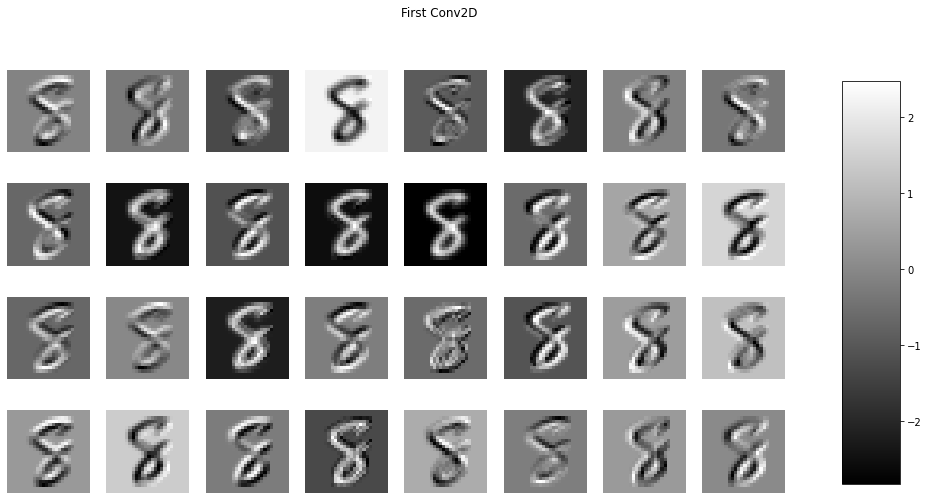



 torch.Size([16, 32, 13, 13])


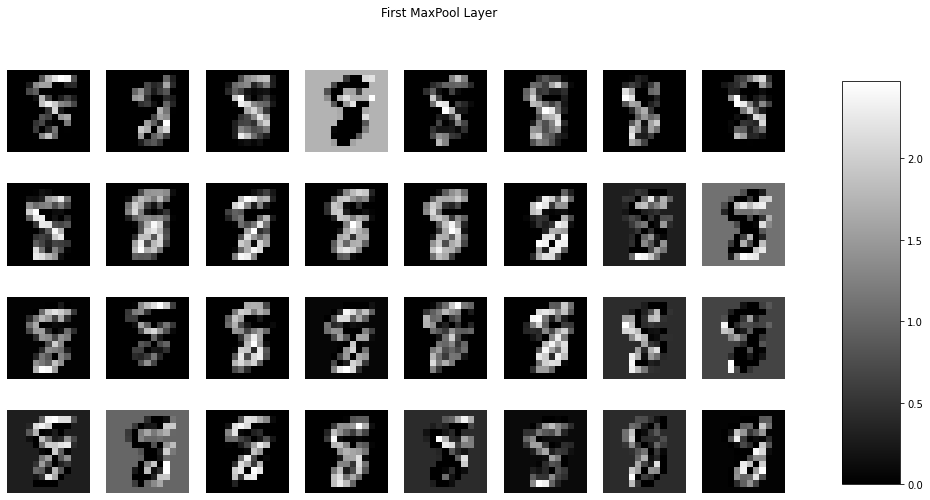



 torch.Size([16, 64, 11, 11])


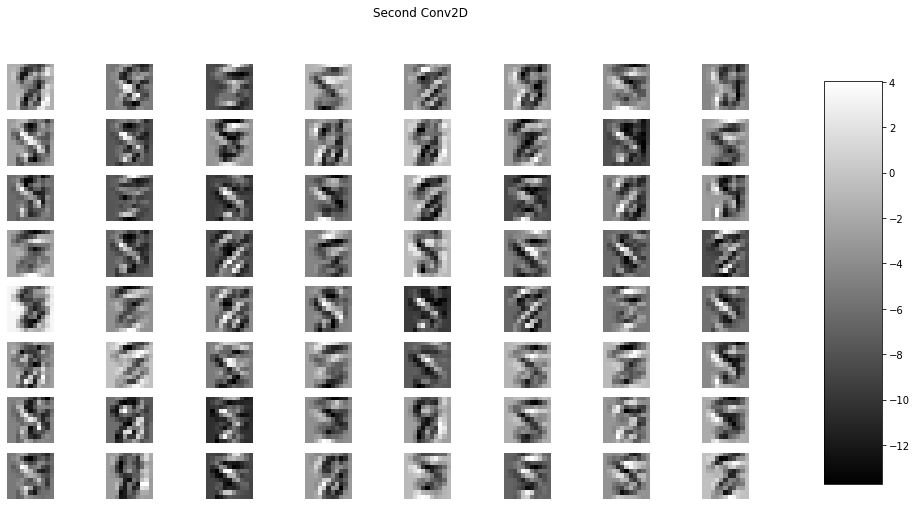



 torch.Size([16, 64, 5, 5])


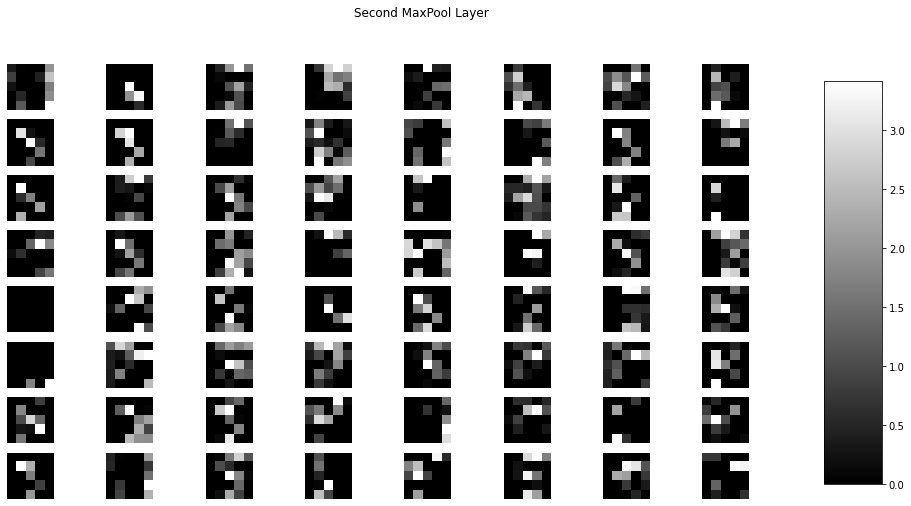



 torch.Size([16, 1600])


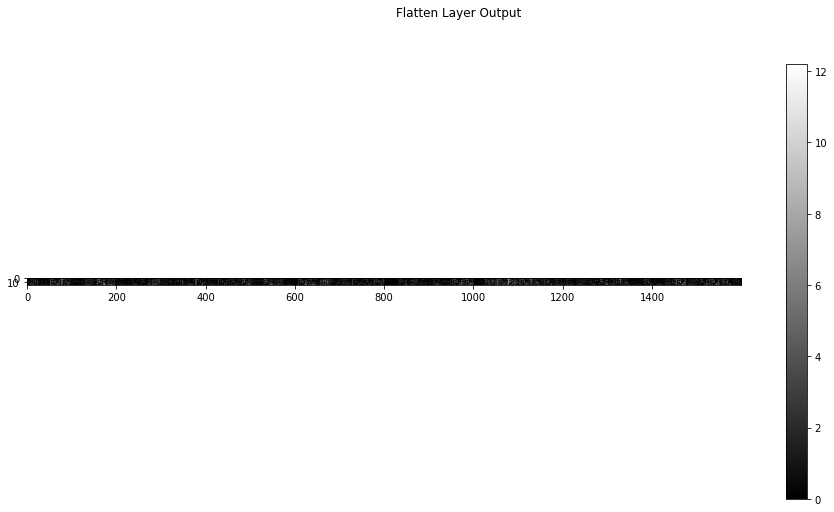



 torch.Size([16, 1600])


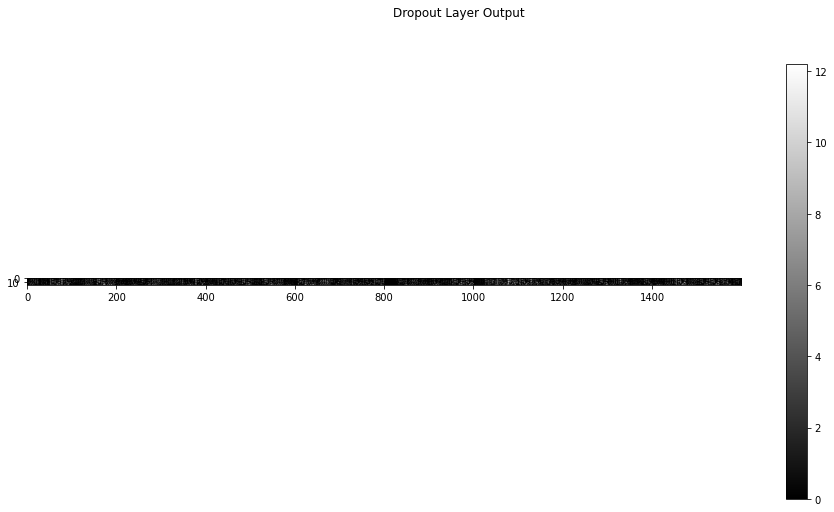



 torch.Size([1, 10])


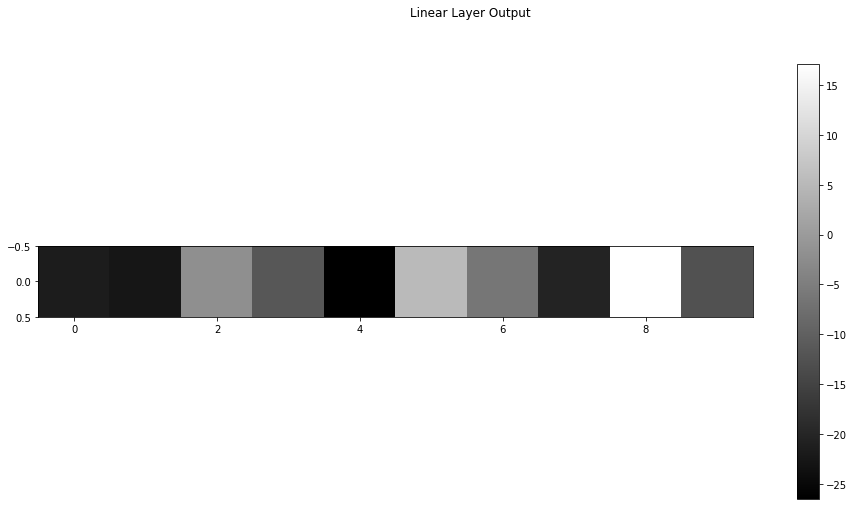

In [35]:
# Get the output of the first convolutional layer
conv_output = net.conv1(images)
# Rearrange dimensions and convert to numpy array
conv_output_image = conv_output.permute(0, 2, 3, 1).detach().numpy()
print("\n\n",conv_output.shape)
conv_max_layer_plot(nrows=4,ncols=8,title='First Conv2D',image=conv_output_image)

relu_1_output = net.relu1(conv_output)

# MaxPool Layer output visualize
max_pool_output_1 = net.pool1(relu_1_output)
# Rearrange dimensions and convert to numpy array
max_pool_output_image = max_pool_output_1.permute(0, 2, 3, 1).detach().numpy()
print('\n\n',max_pool_output_1.shape)
conv_max_layer_plot(nrows=4,ncols=8,title='First MaxPool Layer',image=max_pool_output_image)

# Get the second convulation output and visualize them
conv_output_2 =  net.conv2(max_pool_output_1)

# Rearrange dimensions and convert to numpy array
conv_output_2_image = conv_output_2.permute(0, 2, 3, 1).detach().numpy()
print('\n\n',conv_output_2.shape)
conv_max_layer_plot(nrows=8,ncols=8,title="Second Conv2D",image=conv_output_2_image)

relu_2_output = net.relu2(conv_output_2)

# MaxPool Layer output visualize
max_pool_output_2 = net.pool2(relu_2_output)
# Rearrange dimensions and convert to numpy array
max_pool_output2_image = max_pool_output_2.permute(0, 2, 3, 1).detach().numpy()
print('\n\n',max_pool_output_2.shape)
conv_max_layer_plot(nrows=8, ncols=8,title='Second MaxPool Layer',image=max_pool_output2_image)

# Flatten Output Visualize
flatten_output = max_pool_output_2.view(max_pool_output_2.size(0), -1)
print('\n\n',flatten_output.shape)
flatten_image= flatten_output.detach().cpu().numpy()
fdl_layer_plot(flatten_image,title='Flatten Layer Output')


dropout_output = net.dropout(flatten_output)
print('\n\n',dropout_output.shape)
dropout_image = dropout_output.detach().cpu().numpy()
fdl_layer_plot(image=dropout_image,title="Dropout Layer Output")

# Linear Layer Output Visualize
linear_1 = net.fc1(dropout_output)
linear_1 = linear_1[0].view(1, -1)
print('\n\n',linear_1.shape)
linear_image = linear_1.detach().cpu().numpy()
fdl_layer_plot(linear_image,title='Linear Layer Output')


(16, 26, 26, 32)


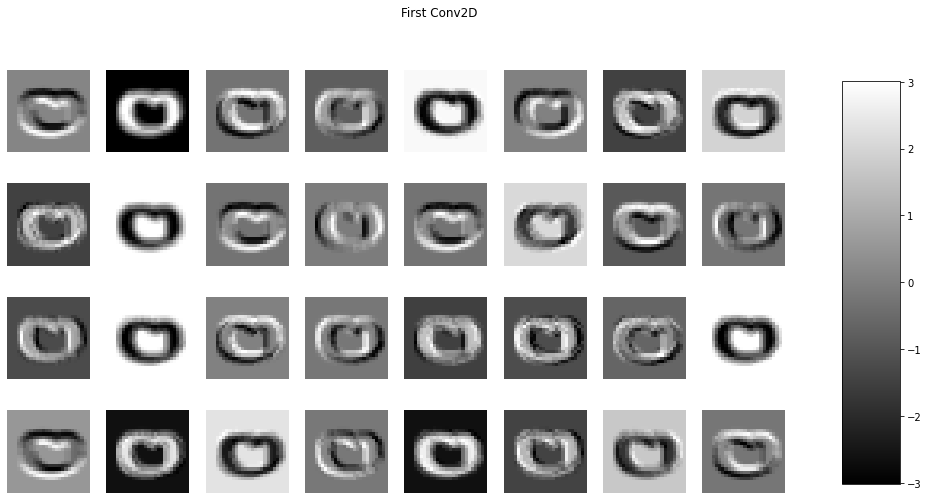

torch.Size([16, 32, 13, 13])


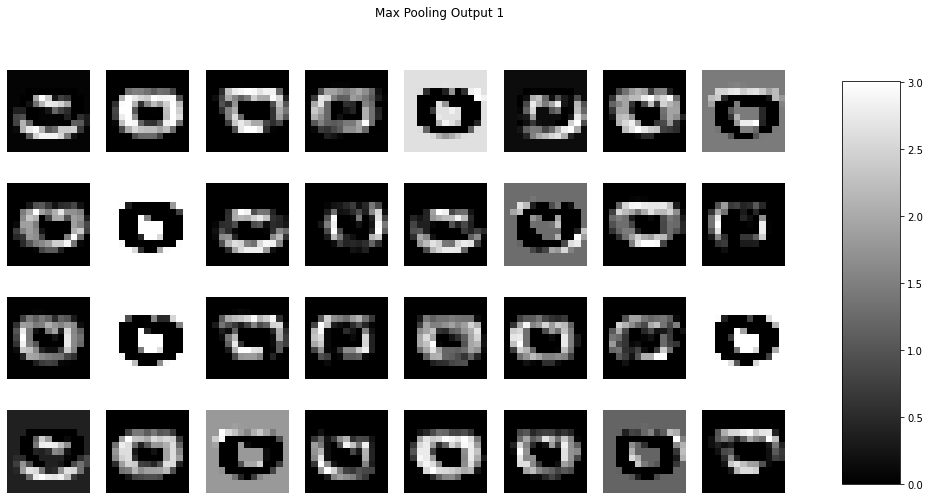

torch.Size([16, 64, 11, 11])


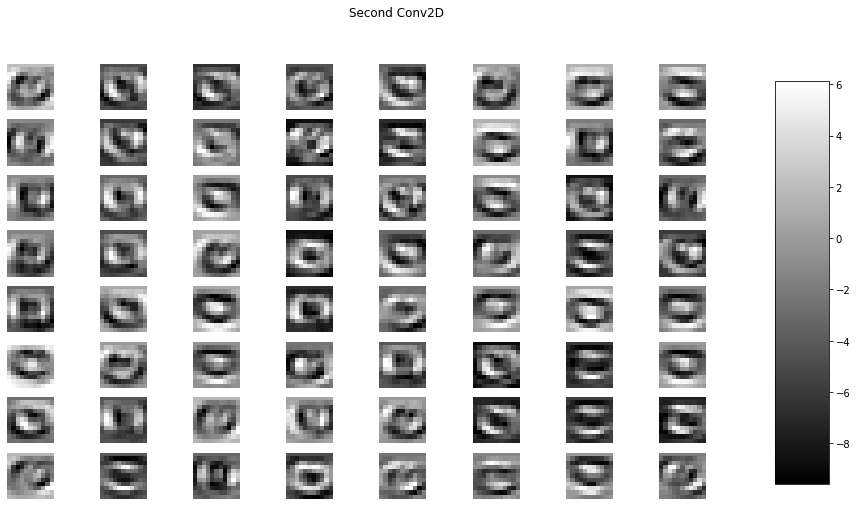

torch.Size([16, 64, 5, 5])


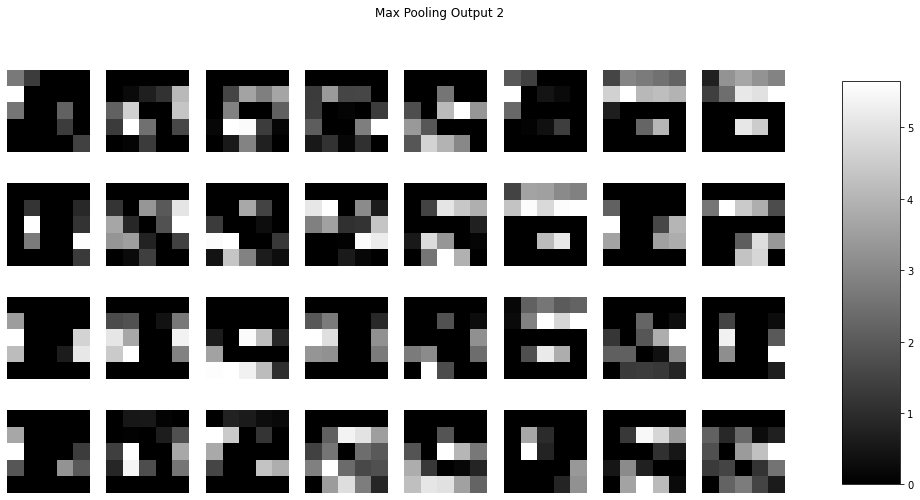

torch.Size([16, 1600])
(16, 1600)


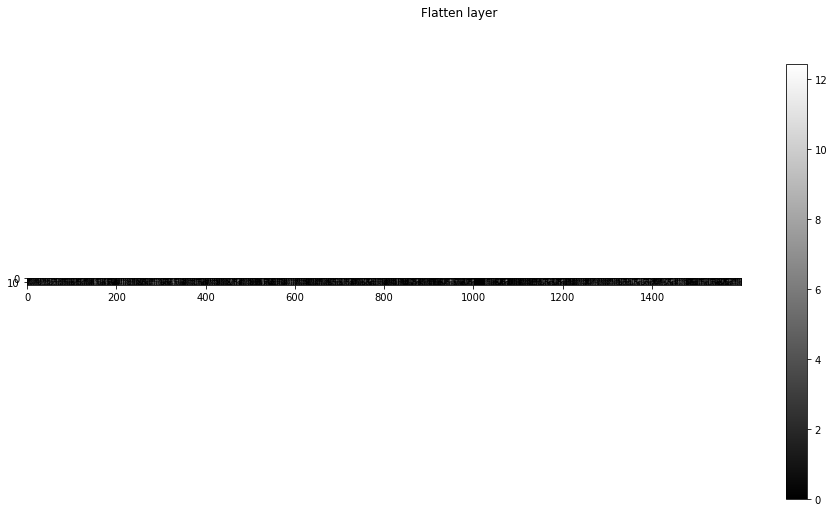

torch.Size([16, 1600])


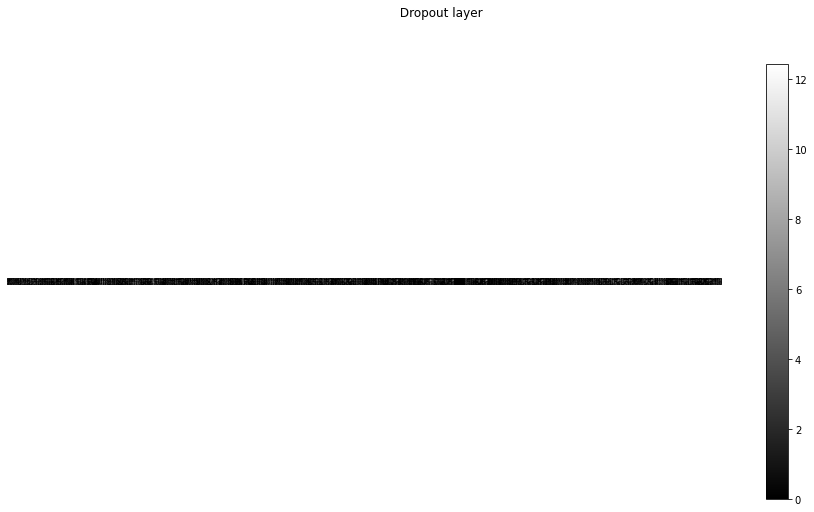

torch.Size([1, 10])


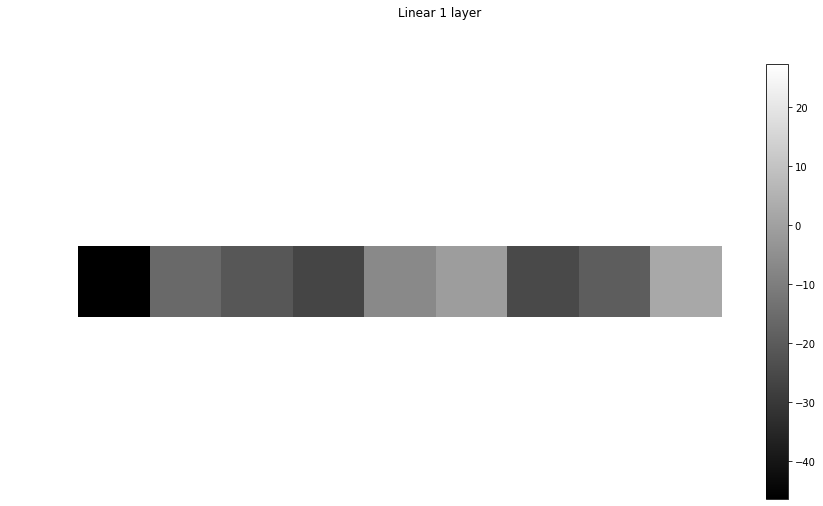

In [ ]:
# Get the output of the first convolutional layer
conv_output = net.conv1(images)
# Rearrange dimensions and convert to numpy array
conv_output_image = conv_output.permute(0, 2, 3, 1).detach().numpy()
print(conv_output_image.shape)
fig, axs = plt.subplots(nrows=4, ncols=8, figsize=(16, 8))
fig.suptitle('First Conv2D')

for i in range(32):
    image_plot = axs[i//8, i%8].imshow(conv_output_image[0, :, :, i], cmap='gray')
    axs[i//8, i%8].axis('off')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(image_plot, cax=cbar_ax)
plt.show()

relu_1_output = net.relu1(conv_output)

# MaxPool Layer output visualize
max_pool_output_1 = net.pool1(relu_1_output)
# Rearrange dimensions and convert to numpy array
max_pool_output_image = max_pool_output_1.permute(0, 2, 3, 1).detach().numpy()
print(max_pool_output_1.shape)
fig, axs = plt.subplots(nrows=4, ncols=8, figsize=(16, 8))
fig.suptitle("Max Pooling Output 1")
for i in range(32):
    image_plot = axs[i//8, i%8].imshow(max_pool_output_image[0, :, :, i], cmap='gray')
    axs[i//8, i%8].axis('off')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(image_plot, cax=cbar_ax)
plt.show()

# Get the second convulation output and visualize them
conv_output_2 =  net.conv2(max_pool_output_1)

# Rearrange dimensions and convert to numpy array
conv_output_2_image = conv_output_2.permute(0, 2, 3, 1).detach().numpy()
print(conv_output_2.shape)
fig, axs = plt.subplots(nrows=8, ncols=8, figsize=(15, 8))
fig.suptitle("Second Conv2D")
for i in range(64):
    image_plot = axs[i//8, i%8].imshow(conv_output_2_image[0, :, :, i], cmap='gray')
    axs[i//8, i%8].axis('off')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(image_plot, cax=cbar_ax)
plt.show()

relu_2_output = net.relu2(conv_output_2)

# MaxPool Layer output visualize
max_pool_output_2 = net.pool2(relu_2_output)
# Rearrange dimensions and convert to numpy array
max_pool_output2_image = max_pool_output_2.permute(0, 2, 3, 1).detach().numpy()
print(max_pool_output_2.shape)
fig, axs = plt.subplots(nrows=4, ncols=8, figsize=(16, 8))
fig.suptitle("Max Pooling Output 2")
for i in range(32):
    image_plot = axs[i//8, i%8].imshow(max_pool_output2_image[0, :, :, i], cmap='gray')
    axs[i//8, i%8].axis('off')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(image_plot, cax=cbar_ax)
plt.show()

# Flatten Output Visualize
flatten_output = max_pool_output_2.view(max_pool_output_2.size(0), -1)
flatten_image = flatten_output
print(flatten_image.shape)
flatten_image= flatten_image.detach().cpu().numpy()
print(flatten_image.shape)
fig, axs = plt.subplots(1 ,figsize=(16, 8))
fig.suptitle("Flatten layer")
image_plot = axs.imshow(flatten_image, cmap='gray')
fig.colorbar(image_plot)
axs.axis('on')
plt.show()

dropout_output = net.dropout(flatten_output)
print(dropout_output.shape)
# Reshape the output tensor into an image format

# dropout_image = dropout_output.reshape(1, 16, 16, 64).permute(0, 3, 1, 2)
# dropout_image = dropout_image.squeeze().detach().numpy()[0]
fig, axs = plt.subplots(1 ,figsize=(16, 8))
fig.suptitle(" Dropout layer")
image_plot = axs.imshow(dropout_output.detach().cpu().numpy(), cmap='gray')
fig.colorbar(image_plot)
axs.axis('off')
plt.show()


# Linear Layer Output Visualize
linear_1 = net.fc1(dropout_output)
linear_1 = linear_1[0].view(1, -1)
print(linear_1.shape)
fig, axs = plt.subplots(1 ,figsize=(16, 8))
fig.suptitle("Linear 1 layer")
image_plot = axs.imshow(linear_1.detach().cpu().numpy(), cmap='gray')
fig.colorbar(image_plot)
axs.axis('off')
plt.show()


In [ ]:
# Convert Jupiter notebook to pdf
!pip install nbconvert
!sudo apt-get install pandoc

!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!pip install pyppeteer
!jupyter nbconvert --to pdf '/content/drive/MyDrive/computer_vision_course_Udecity/CVND_Exercises-master/Friend Project/Visualize_Each_Of_These_Neural_Network_Output.ipynb'


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (2.5-3build2).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-fonts-recommended is already the newest version (2019.20200218-1).
texlive-plain-generic is already the newest version (2019.202000218-1).
texlive-xetex is already the newest version (2019.20200218-1).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[NbConvertApp] Converting notebook /content/drive/MyDrive/computer_vision_course_Udecity/CVND_Exercises-master/Friend Project/Visualize_Each_Of_These_Neural_Network_Output.ipynb to pdf
[NbConvertApp] Support files will b